# Task 27: Evaluation Techniques for Classification Models

In this notebook, we will explore various evaluation techniques for classification models using scikit-learn. We will use the Iris dataset and several classification algorithms to illustrate these techniques.

## 1. Import Libraries
Let's start by importing the necessary libraries.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 2. Load and Prepare Data
We will use the Iris dataset and preprocess it for classification.


In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data Loaded and Preprocessed")

Data Loaded and Preprocessed


## 3. Train Classification Models
We'll train several classification models to evaluate their performance.


In [3]:
# Define classifiers
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'k-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machines': SVC(probability=True),
    'Decision Trees': DecisionTreeClassifier(),
    'Random Forests': RandomForestClassifier(n_estimators=100)
}

# Train models and store predictions
model_predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_predictions[name] = y_pred

print("Models Trained and Predictions Made")

Models Trained and Predictions Made


## 4. Evaluate Models
We will use various metrics to evaluate the performance of each classification model.


Model: Logistic Regression
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



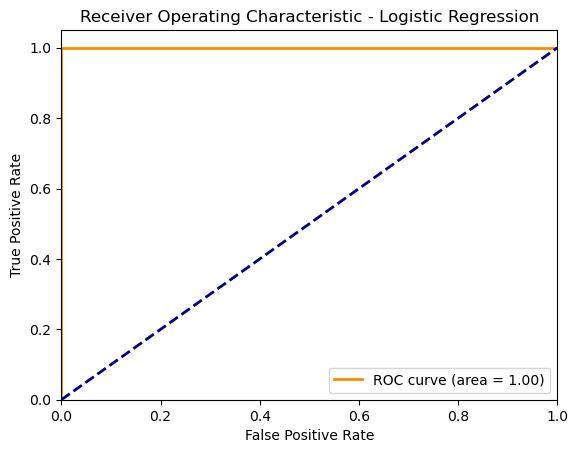



Model: k-Nearest Neighbors
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



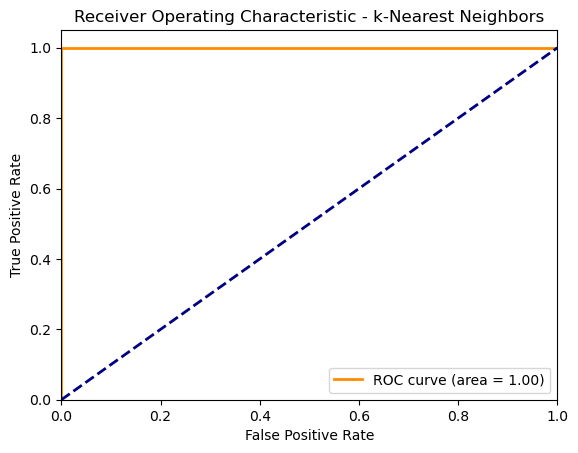



Model: Support Vector Machines
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



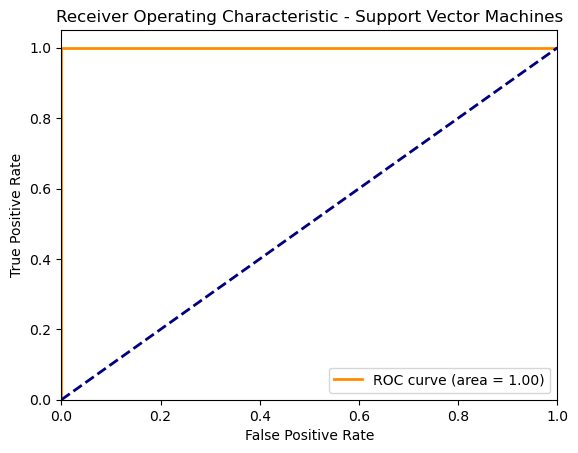



Model: Decision Trees
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



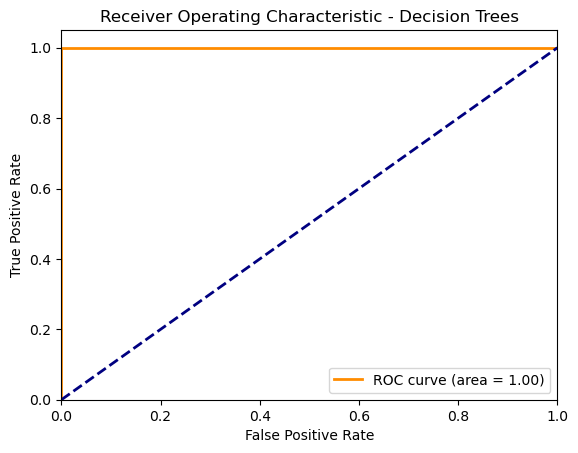



Model: Random Forests
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



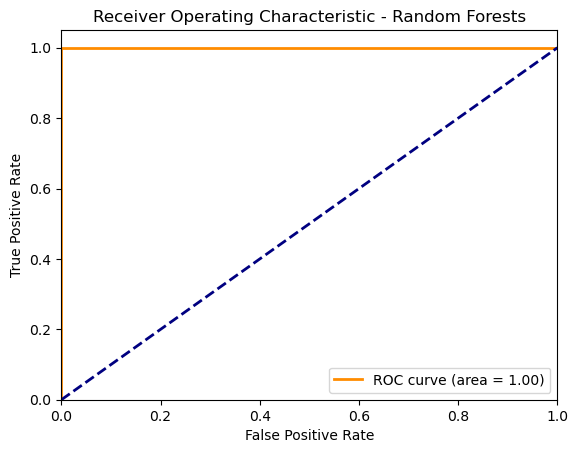

In [4]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"Model: {model_name}")
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Precision
    precision = precision_score(y_true, y_pred, average='weighted')
    print(f"Precision: {precision:.2f}")
    
    # Recall
    recall = recall_score(y_true, y_pred, average='weighted')
    print(f"Recall: {recall:.2f}")
    
    # F1 Score
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"F1 Score: {f1:.2f}")
    
    # Classification Report
    report = classification_report(y_true, y_pred, target_names=iris.target_names)
    print("Classification Report:")
    print(report)
    
    # ROC Curve and AUC
    if hasattr(models[model_name], "predict_proba"):
        y_prob = models[model_name].predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_true, y_prob, pos_label=1)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {model_name}')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("ROC Curve and AUC cannot be computed for this model.")
    
    print("\n")

# Evaluate each model
for name, y_pred in model_predictions.items():
    evaluate_model(y_test, y_pred, name)

In [6]:
### Summary

1. **Confusion Matrix**: Shows the counts of true positives, true negatives, false positives, and false negatives.
2. **Accuracy**: The ratio of correctly predicted instances to the total instances.
3. **Precision**: The ratio of true positives to the sum of true positives and false positives.
4. **Recall**: The ratio of true positives to the sum of true positives and false negatives.
5. **F1 Score**: The harmonic mean of precision and recall.
6. **ROC Curve and AUC**: Evaluate the trade-offs between true positives and false positives; AUC measures overall model performance.
7. **Classification Report**: Provides precision, recall, F1 score, and support for each class.

This notebook demonstrates how to apply and interpret various evaluation techniques to assess the performance of classification models.


SyntaxError: invalid syntax (4134476098.py, line 3)